In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from models.sms_ml_gradient_boosting_classifier import (
    SingletonSMSMLGradientBoostingClassifier,
)
from models.sms_ml_knn_classifier import SingletonSMSMLKNNClassifier
from models.sms_ml_logistic_regression_classifier import (
    SingletonSMSMLLogisticRegressionClassifier,
)
from models.sms_ml_naive_bayes_classifier import SingletonSMSMLNaiveBayesClassifier
from models.sms_ml_random_forest_classifier import SingletonSMSMLRandomForestClassifier
from models.sms_ml_svm_classifier import SingletonSMSMLSVMClassifier
from models.sms_bert_classifier import SingletonSMSBERTClassifier
from models.sms_lstm_classifier import SingletonSMSLSTMClassifier
from models.sms_rnn_classifier import SingletonSMSRNNClassifier
from utils.sms_utils import load_data_from_csv
import numpy as np
from utils.sms_utils import preprocess_text, balance_dataset

def evaluate_classifiers(classifiers, X_train, Y_train, X_test, Y_test, is_training):
    accuracies = []
    for classifier in classifiers:
        if is_training:
            classifier.train(X_train.copy(), Y_train.copy())
            classifier.save()
        else:
            classifier.load()

        print(f"Evaluating {classifier.model_name}...")
        Y_pred = classifier.predict(X_test.copy())
        accuracy = accuracy_score(Y_test.copy(), Y_pred)
        print(f"Accuracy: {accuracy}")
        accuracies.append(accuracy * 100)
    return accuracies


def plot_accuracies(model_names, accuracies):
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Comparison")
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha="center", va="bottom")
    plt.show()

/Users/ngosangns/Github/spam-sms-detector-1123/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluating svm...
Accuracy: 0.9880682987039704
Evaluating naive_bayes...
Accuracy: 0.9521909072207365
Evaluating random_forest...
Accuracy: 0.9930466982102448
Evaluating logistic_regression...
Accuracy: 0.9855585270520469


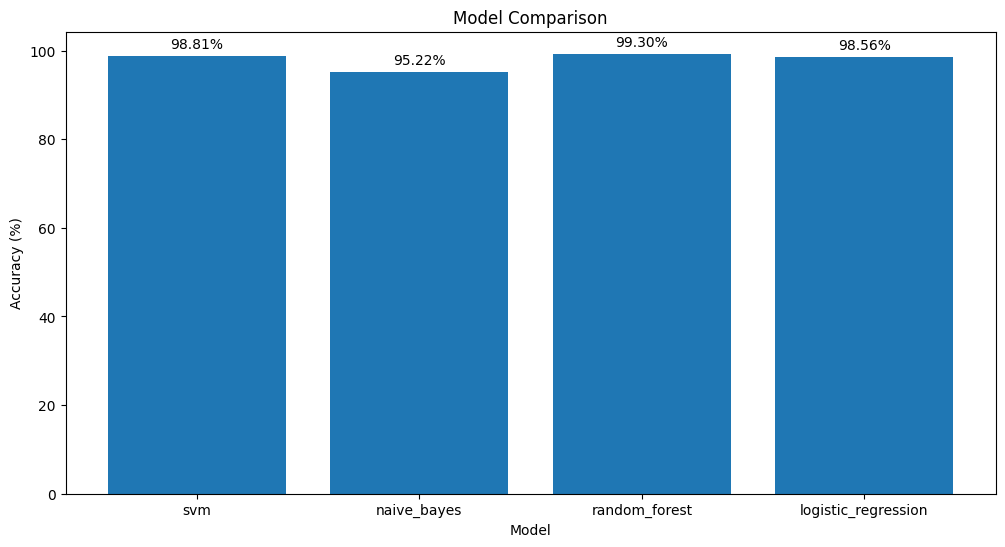

In [3]:
SMS_CSV_PATH = "./data/sms-data.csv"
SMS_CSV_PATH_2 = "./data/sms-data-corpus.csv"
MODEL_DIR = "./trained_models"
IS_TRAINING = False

classifiers = [
    SingletonSMSMLSVMClassifier(MODEL_DIR),
    SingletonSMSMLNaiveBayesClassifier(MODEL_DIR),
    SingletonSMSMLRandomForestClassifier(MODEL_DIR),
    SingletonSMSMLLogisticRegressionClassifier(MODEL_DIR),
    # SingletonSMSLSTMClassifier(MODEL_DIR),
    # SingletonSMSBERTClassifier(MODEL_DIR),
    # SingletonSMSRNNClassifier(MODEL_DIR),

    # Low accuracy models
    # SingletonSMSMLGradientBoostingClassifier(MODEL_DIR),
    # SingletonSMSMLKNNClassifier(MODEL_DIR),
]
model_names = [classifier.model_name for classifier in classifiers]

X, Y = load_data_from_csv(SMS_CSV_PATH)
X = np.array([preprocess_text(x) for x in X])
X, Y = balance_dataset(X, Y)

X2, Y2 = load_data_from_csv(SMS_CSV_PATH_2)
X2 = np.array([preprocess_text(x) for x in X2])

accuracies = evaluate_classifiers(
    classifiers, X, Y, X2, Y2, IS_TRAINING
)

# X_train, X_test, Y_train, Y_test = train_test_split(
#     X, Y, test_size=0.2, random_state=42
# )
# accuracies = evaluate_classifiers(
#     classifiers, X_train, Y_train, X_test, Y_test, IS_TRAINING
# )

plot_accuracies(model_names, accuracies)